## **HEART FAILURE FAILURE ANALYSIS AND PREDICTION USING CLINICAL RECORD DATASET**



*   **MACHINE LEARNING AND CARDIOVASCULAR DISEASES**




Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly exhibit as myocardial infarctions and heart failures. Heart failure occurs when the heart cannot pump enough blood to meet the needs of the body.Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values, which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations otherwise undetectable by medical doctors. Machine learning, in particular, can predict patients’ survival from their data and can individuate the most important features among those included in their medical records.



*  **METHODS USED TO CREATE OUR ML MODEL**




Several classifiers are applied to the dataset which will both predict the the patient's survival and rank the attributes according to their contribution in the final result .

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

**DATASET ATTRIBUTES AND PROPERTIES**

In [ ]:
#IMPORTING LIBRARIES REQUIRED FOR PROGRAMMING
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#tells the IPython environment to draw the plots immediately after the current cell
%matplotlib inline




**READ DATA**

In [ ]:
# We are reading our data
#Create a simple Pandas DataFrame
df = pd.read_csv("/content/heart.csv")

In [ ]:
# First 5 rows of our data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

> **DATA EXPLORATION AND ANALYSIS**

In [ ]:
# print information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**this dataset doesn’t hold any missing values.**

dataset.info( ) gives us the properties of our clinical records dataset.

There are a total of 13 columns :

*  age - age in years
*  sex - (1 = male; 0 = female)
*   cp - chest pain type

TA: Typical Angina

ATA: Atypical Angina

NAP: Non-Anginal Pain

ASY: Asymptomatic
*   trestbps - resting blood pressure (in mm Hg on admission to the hospital)
*  chol - serum cholestoral in mg/dl
*  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
            0: normal
            1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
*  thalach - maximum heart rate achieved
*   exang - exercise induced angina (1 = yes; 0 = no)
*   oldpeak - ST depression induced by exercise relative to rest
*   slope - the slope of the peak exercise ST segment
*   ca - number of major vessels (0-3) colored by flourosopy
*   thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
*  output - have disease or not (1=yes, 0=no)


In [ ]:
# obtain the shape of a DataFrame
#303 rows and 14 columns
df.shape


(303, 14)

In [ ]:
#axis=1 is vertical axis, to remove columns if axis=1 you will be removing columns
df=df.dropna(axis=1)

In [ ]:
#returns description of the data in the DataFrame
#we are getting some information from each feature to see how statistically the dataset is spread.
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# load seaborn's default theme and color palette to the session.
sns.set()

Histogram plots are a way of representing the distribution of data. It is an estimate of the probability distribution of a continuous or discrete variable.

Bins: These are the intervals into which the data range is divided.

**DATA VISUALIZATION**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

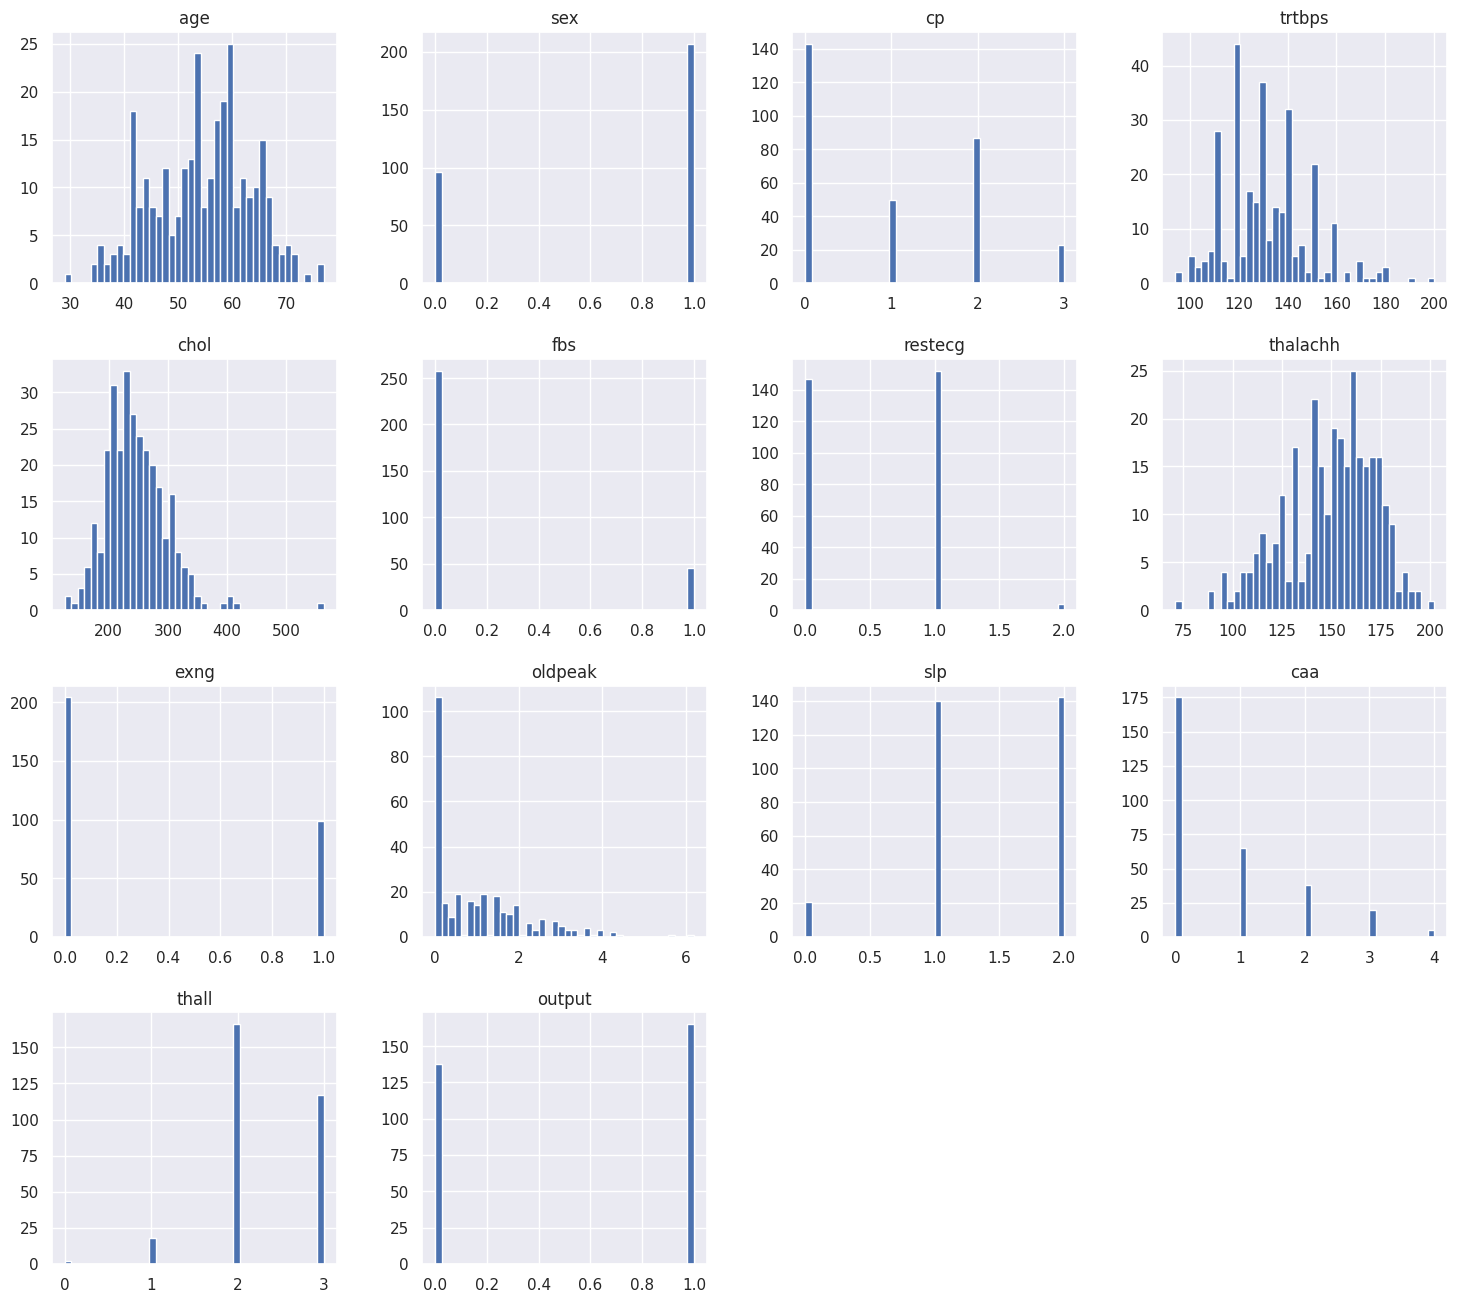

In [ ]:
#PLOTTING HISTOGRAM OF DEFINED SIZE
df.hist(bins = 40, figsize = (18, 16))

In [ ]:
#returns a Series that contain counts of unique values
#1 indicates people with heart failures and 0 indicates people without heart failures
df.output.value_counts()


1    165
0    138
Name: output, dtype: int64

In [ ]:
#HERE IN THIS CASE FOR TARGET FEATURE PEOPLE HAVING HEART FAILURE IS 165 AND PEOPLE WITHOUT HEART FAILURE IS GIVEN 138

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
#represent the occurrence(counts) of the observation present in the categorical variable.
#It uses the concept of a bar chart for the visual depiction.

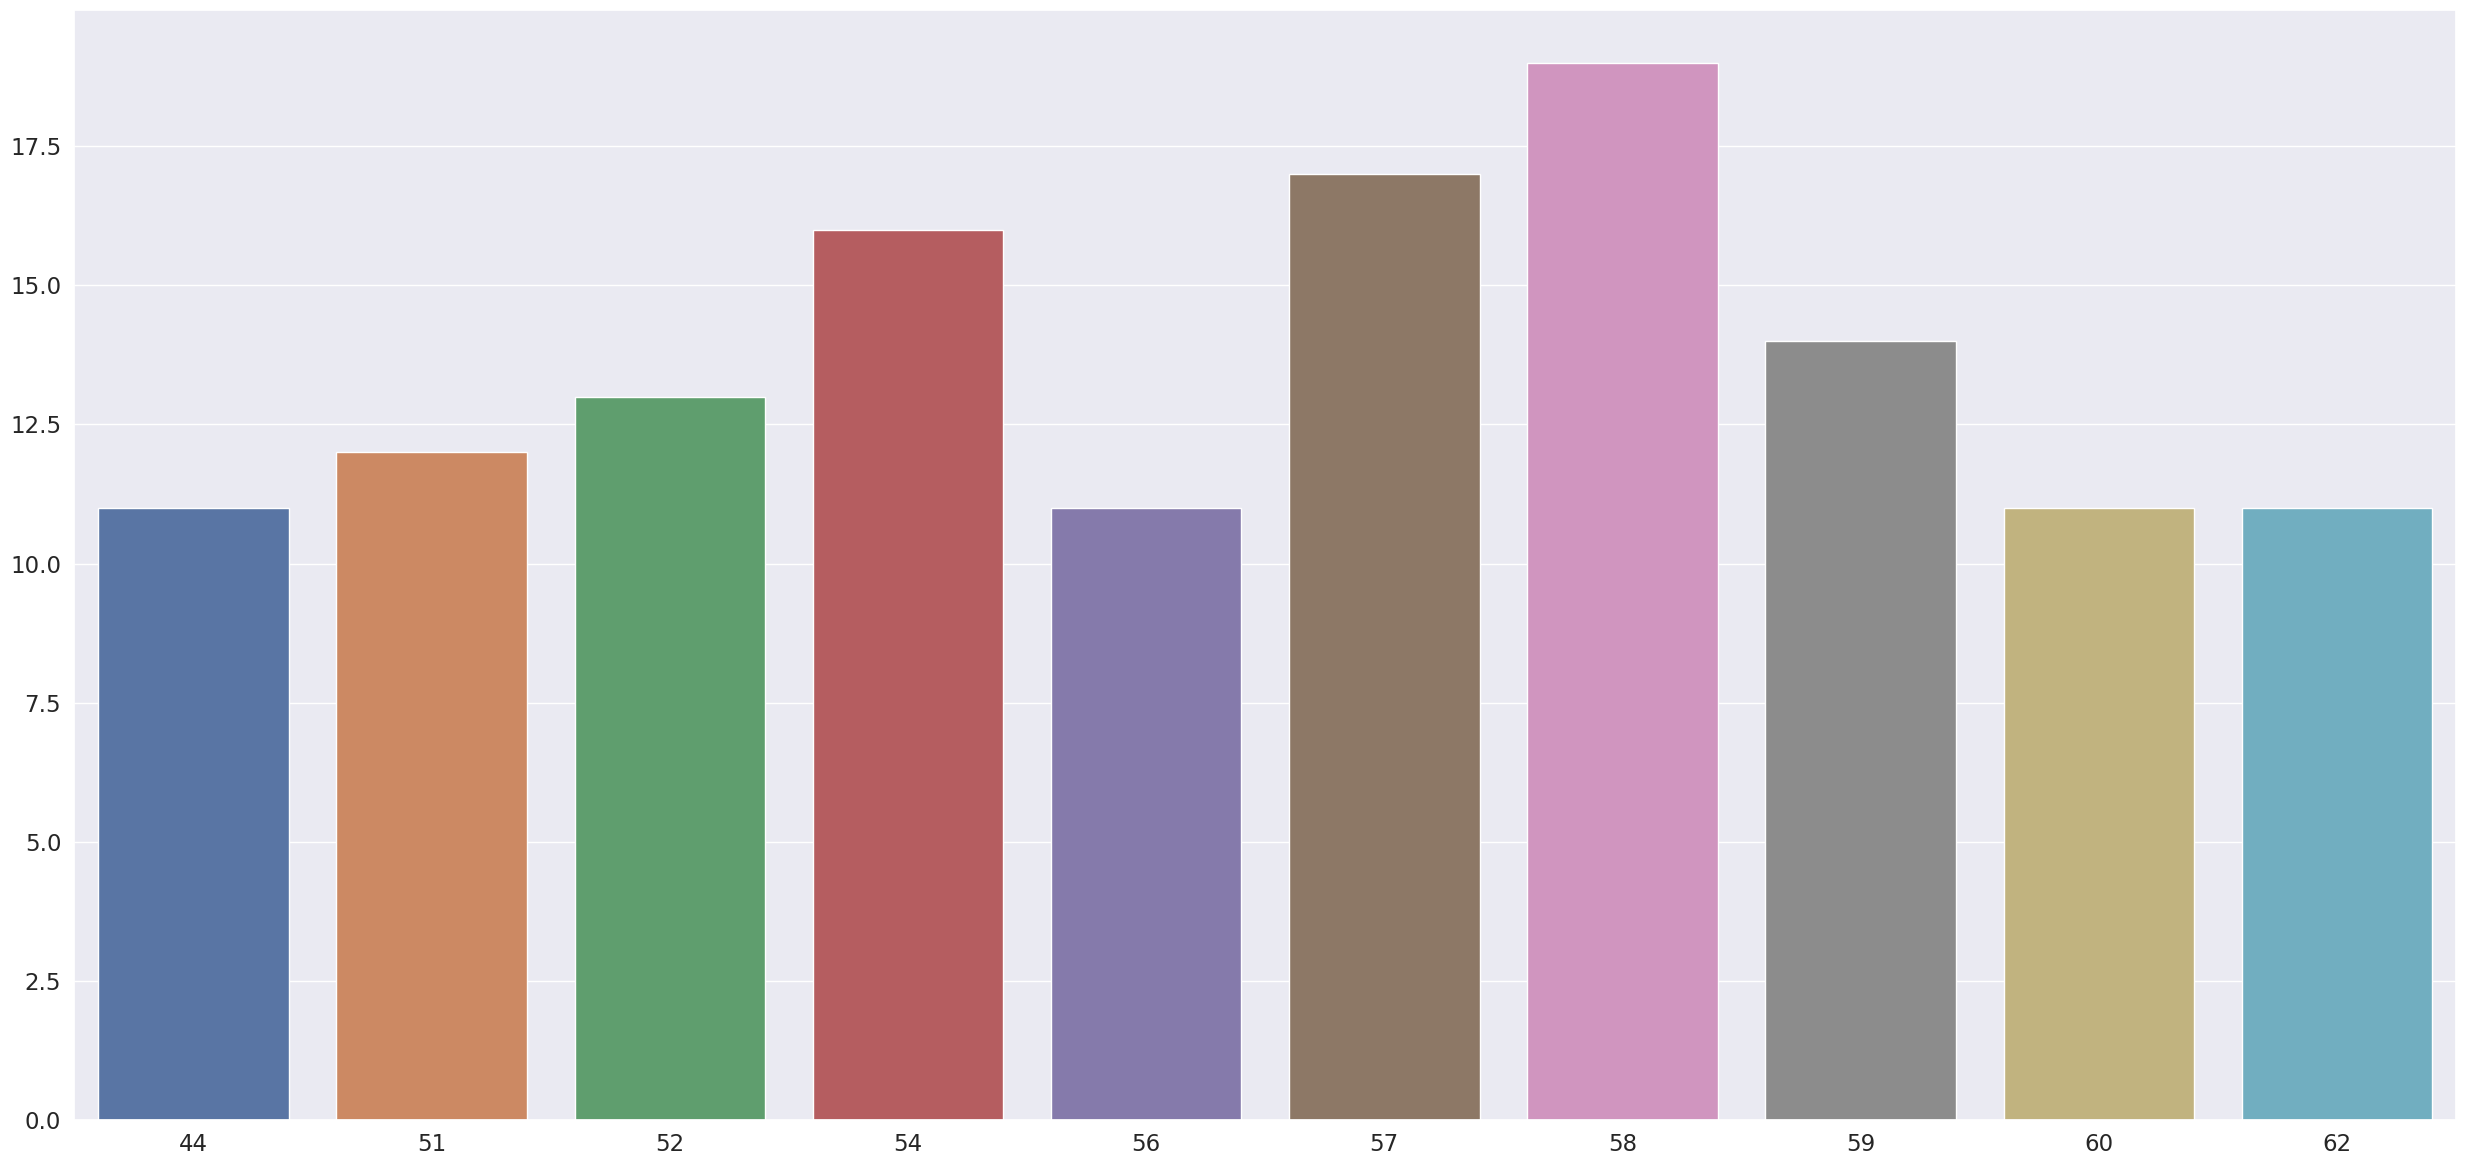

In [ ]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.tight_layout()

**Here we can see that the 58 age column has the highest frequency.**

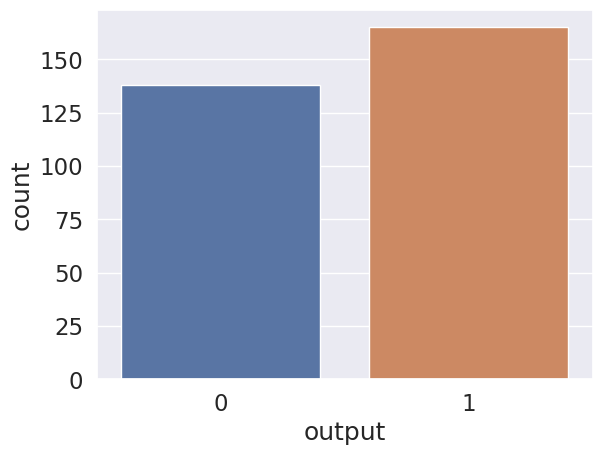

In [ ]:
#PERCENTAGE OF PEOPLE WITH AND WITHOUT HEART FAILURE
sns.countplot(x="output", data=df)
plt.show()
#1    526
#0    499

In [ ]:
#formats the specified value(s) and insert them inside the string's placeholder.
#compute the length of each element in the Series/Index
countNoDisease = len(df[df.output == 0])
countHaveDisease = len(df[df.output == 1])
print("Percentage of Patients dont have Heart Disease: {:.2f}%".format((countNoDisease / (len(df.output))*100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.output))*100)))

Percentage of Patients dont have Heart Disease: 45.54%
Percentage of Patients have Heart Disease: 54.46%


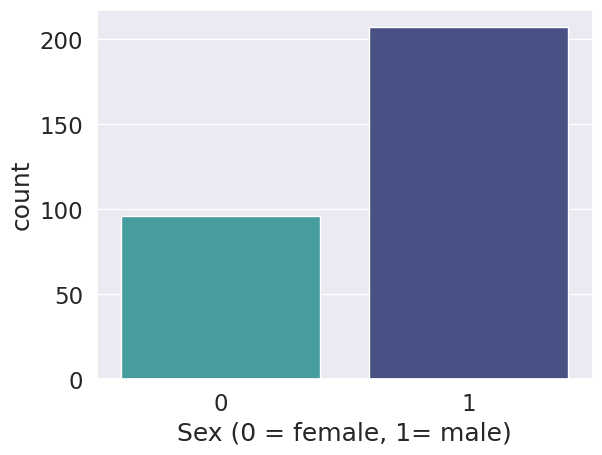

In [ ]:
#bar representation of sex
#Dataset for plotting.
sns.countplot(x='sex', data=df,palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
#calculate percentage of females and males with heart failure
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


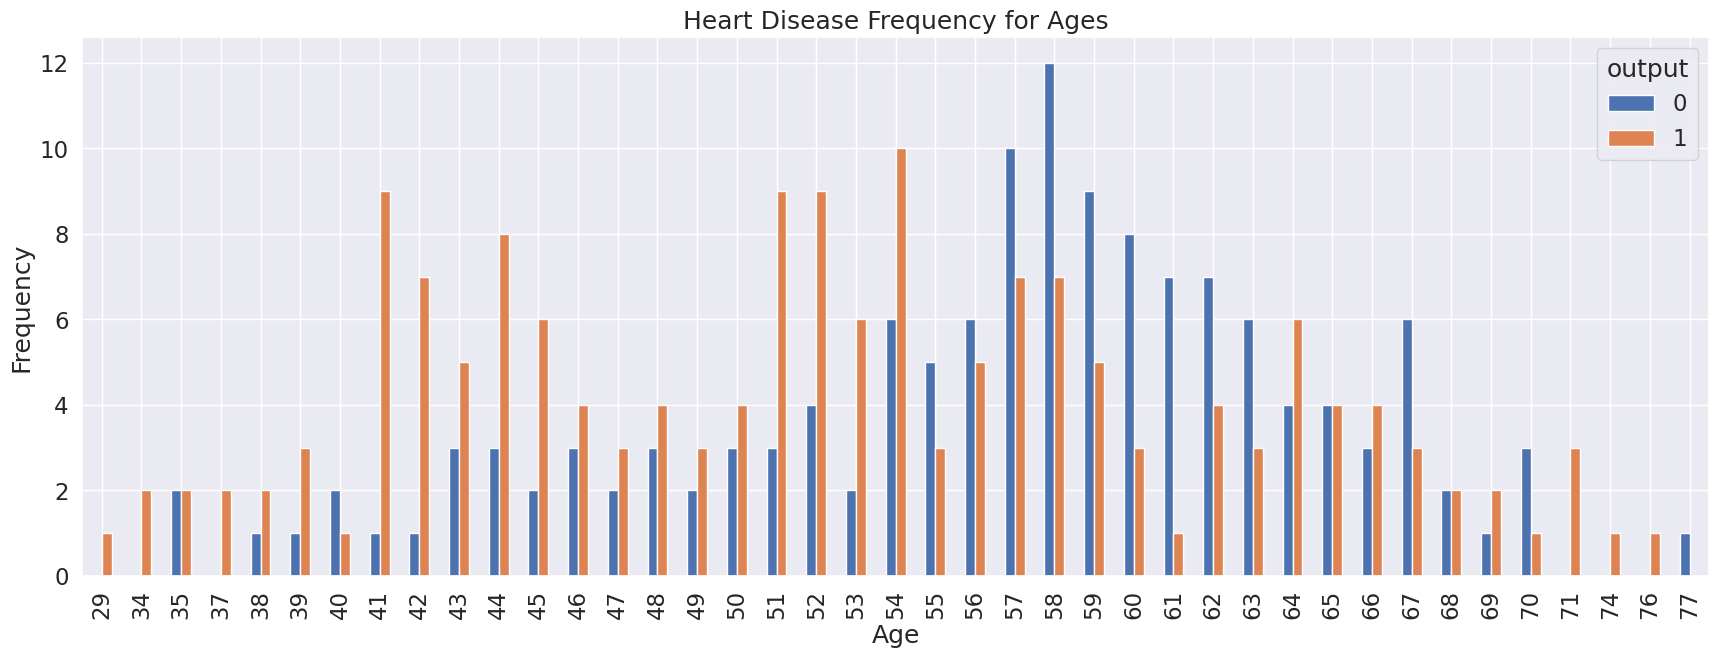

In [ ]:
#we see a breakdown of the counts of each profile
# allows us to compare two categories.
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(21,7))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

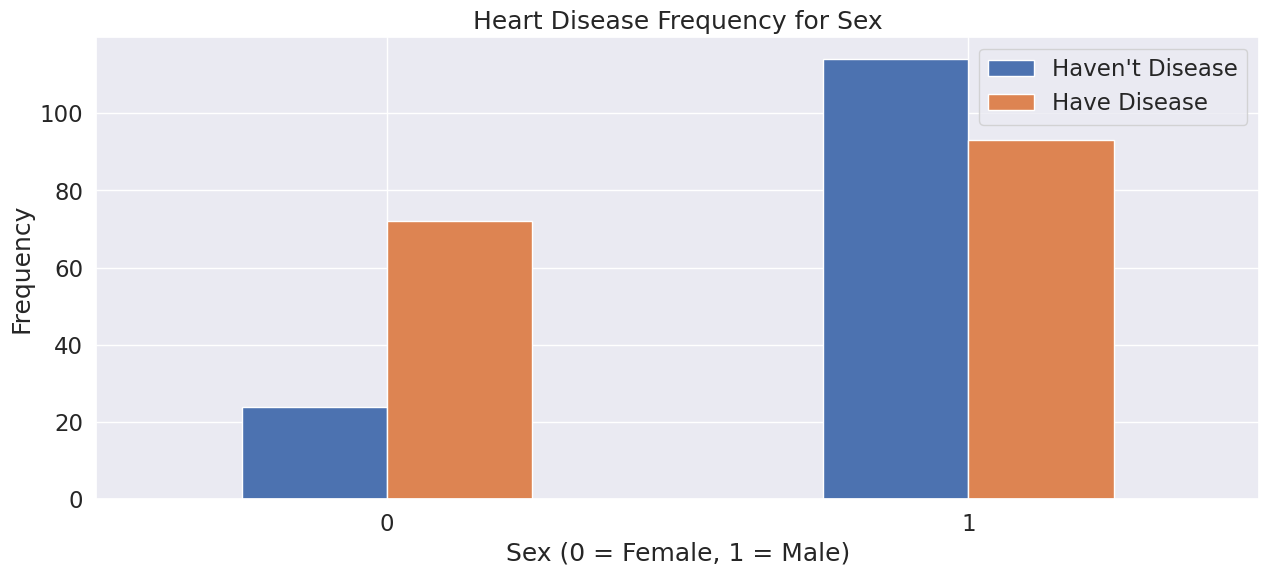

In [ ]:
#to create a crosstab for showing heart failures present or absent for females and males
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["no Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

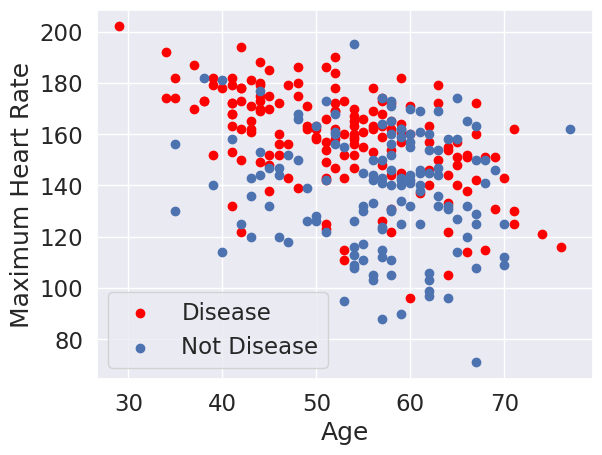

In [ ]:
#to create a scatter points chart
#scatter plot for age group with heart failure vs their corresponding heart rate
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="red")
#scatter plot for age group without heart failure vs their corresponding heart rate
plt.scatter(x=df.age[df.output==0], y=df.thalachh[(df.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

we can see from the above graph that the red dots indicating people having heart failures are having highest maximum heart rates compared to the rest

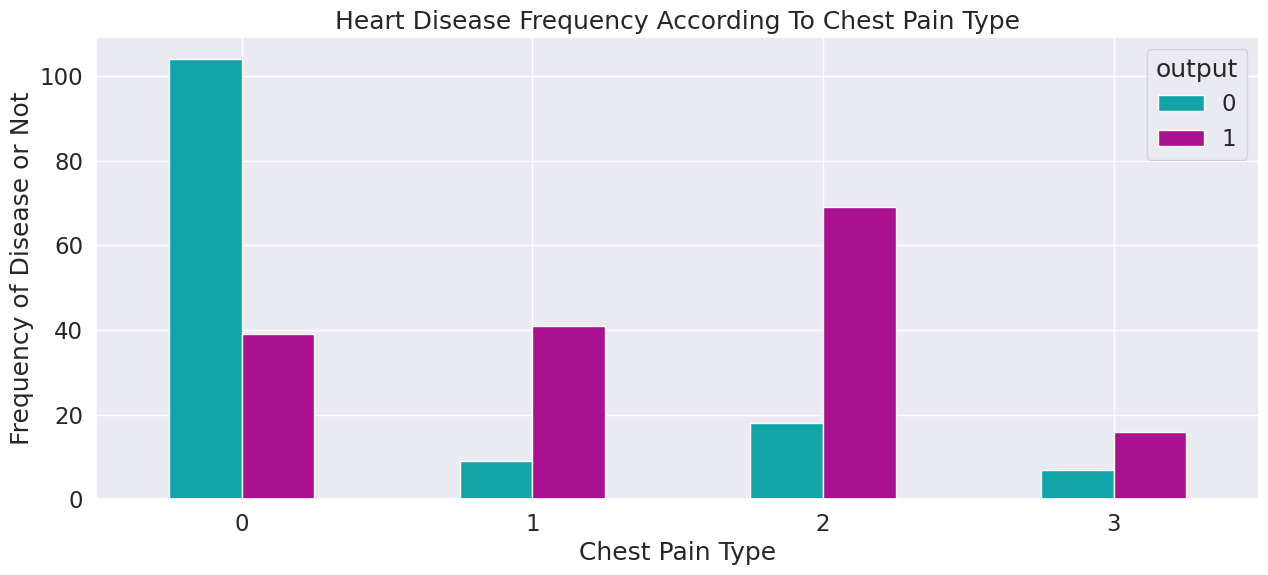

In [ ]:
pd.crosstab(df.cp,df.output).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

**CORRELATIONS BETWEEN FEATURES**

Gives information of different features correlation with each oyher and the target variable.

**Seaborn Heatmap for Visualising Data Correlations**

<Axes: >

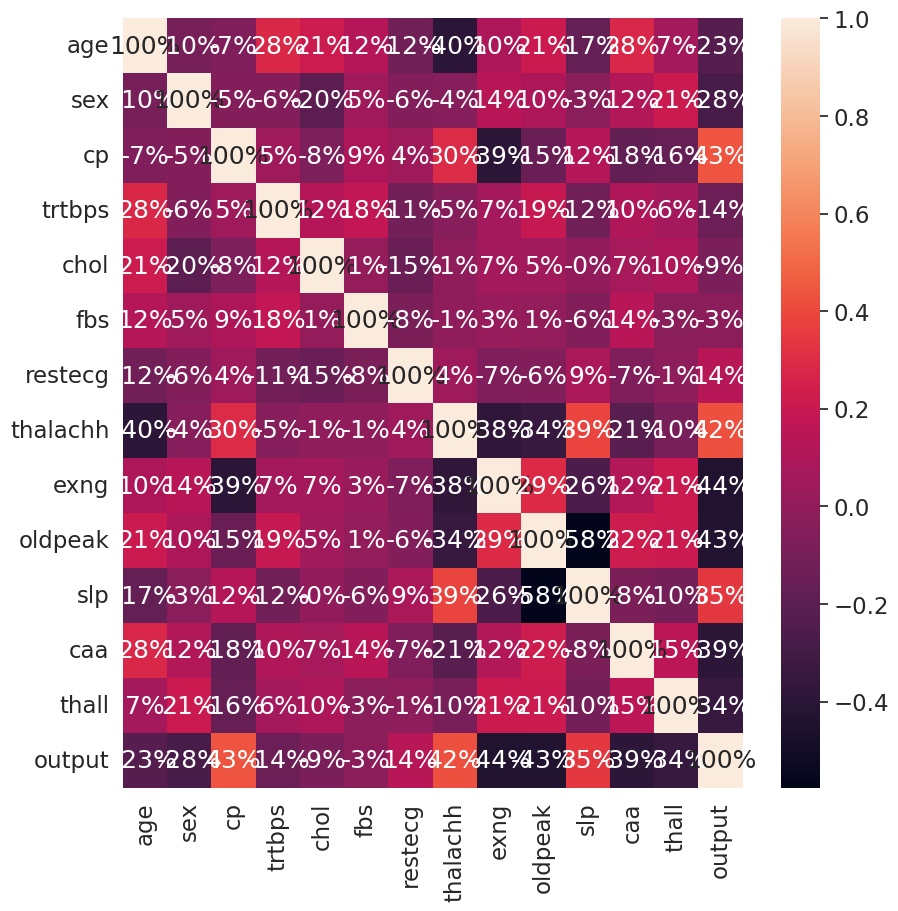

In [ ]:
# to check the correlation between the features so that we can analyze that which feature is
# negatively correlated and which is positively correlated
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:14].corr(),fmt=".0%")

From the above heatmap, we can devise the following observations regarding the correlations between features:

By comparing all the features and their correlation with the target variable.

Four feature( “cp”, “restecg”, “thalach”, “slope” ) are negatively correlated with the target feature. Other features are positively correlated with the target feature.

From the above features correlation we can infer that ("trestbps",restecg,fbs,chol") have low correlation with the target variable so we can reduce the features for our spliiting process.

**FEATURE REDUCTION FOR INCREASING ACCURACY**

In [ ]:
df = df.drop(columns = ['trtbps', 'fbs', 'restecg','chol'])
df.head()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

**SPLIT THE DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df.output.values
x_data = df.drop(['output'], axis = 1)

**NORMALIZING THE DATASET**

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

**TRAINING AND TESTING DATASET**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [ ]:
#PRINTING THE SELECTED TRAINED FEATURES
print(x_train)

          age  sex        cp  thalachh  exng   oldpeak  slp   caa     thall
124  0.208333  0.0  0.666667  0.824427   0.0  0.000000  1.0  0.00  0.666667
72   0.000000  1.0  0.333333  1.000000   0.0  0.000000  1.0  0.00  0.666667
15   0.437500  0.0  0.666667  0.664122   0.0  0.258065  0.5  0.00  0.666667
10   0.520833  1.0  0.000000  0.679389   0.0  0.193548  1.0  0.00  0.666667
163  0.187500  1.0  0.666667  0.778626   0.0  0.000000  1.0  1.00  0.666667
..        ...  ...       ...       ...   ...       ...  ...   ...       ...
188  0.437500  1.0  0.666667  0.702290   0.0  0.096774  0.5  0.25  1.000000
71   0.458333  1.0  0.666667  0.633588   1.0  0.000000  1.0  0.25  1.000000
106  0.833333  1.0  1.000000  0.458015   0.0  0.016129  0.5  0.25  0.666667
270  0.354167  1.0  0.000000  0.557252   0.0  0.129032  1.0  0.00  1.000000
102  0.708333  0.0  0.333333  0.824427   0.0  0.000000  1.0  0.50  0.666667

[212 rows x 9 columns]


In [ ]:
#PRINTING THE TRAINED DATASET OF LABELS
print(y_train)

[1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1]


**DATA PREPROCESSING -FEATURE SELECTION**

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(x_train)
X_test=StandardScaler().fit_transform(x_test)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

**CLASSIFICATION MODELS**

1)**CLASSFICATION MODEL-LOGISTIC REGRESSION**

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, based on a given dataset of independent variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
#IMPORT LOGISTIC REGRESSION LIBRARY
regModel=LogisticRegression()
regModel.fit(x_train,y_train)
#predict the data using the test data
y_predict=regModel.predict(x_test)
print(y_predict)

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1]


In [ ]:
#Returns the model's probabilities using the input relation
regModel.predict_proba(x_test)
# to calculate accuracy since it is such a common metric
regModel.score(x_test,y_test)

0.8021978021978022

**IMPORTING CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_predict)
print(confusion_matrix)

[[33  8]
 [10 40]]


In [ ]:
pred=regModel.predict(x_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(y_test)

Predicted values:
[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1]
Actual values:
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]


----------------------------------------------------------------------------------------------------------------------------

2)**CLASSFICATION MODEL-DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clasf = DecisionTreeClassifier()
clasf = clasf.fit(x_train,y_train)

In [ ]:
#predict the data with testing data
y_pred = clasf.predict(x_test)

In [ ]:
pred=clasf.predict(x_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(y_test)

Predicted values:
[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1]
Actual values:
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]


In [ ]:
from sklearn.tree import export_graphviz
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from six import StringIO


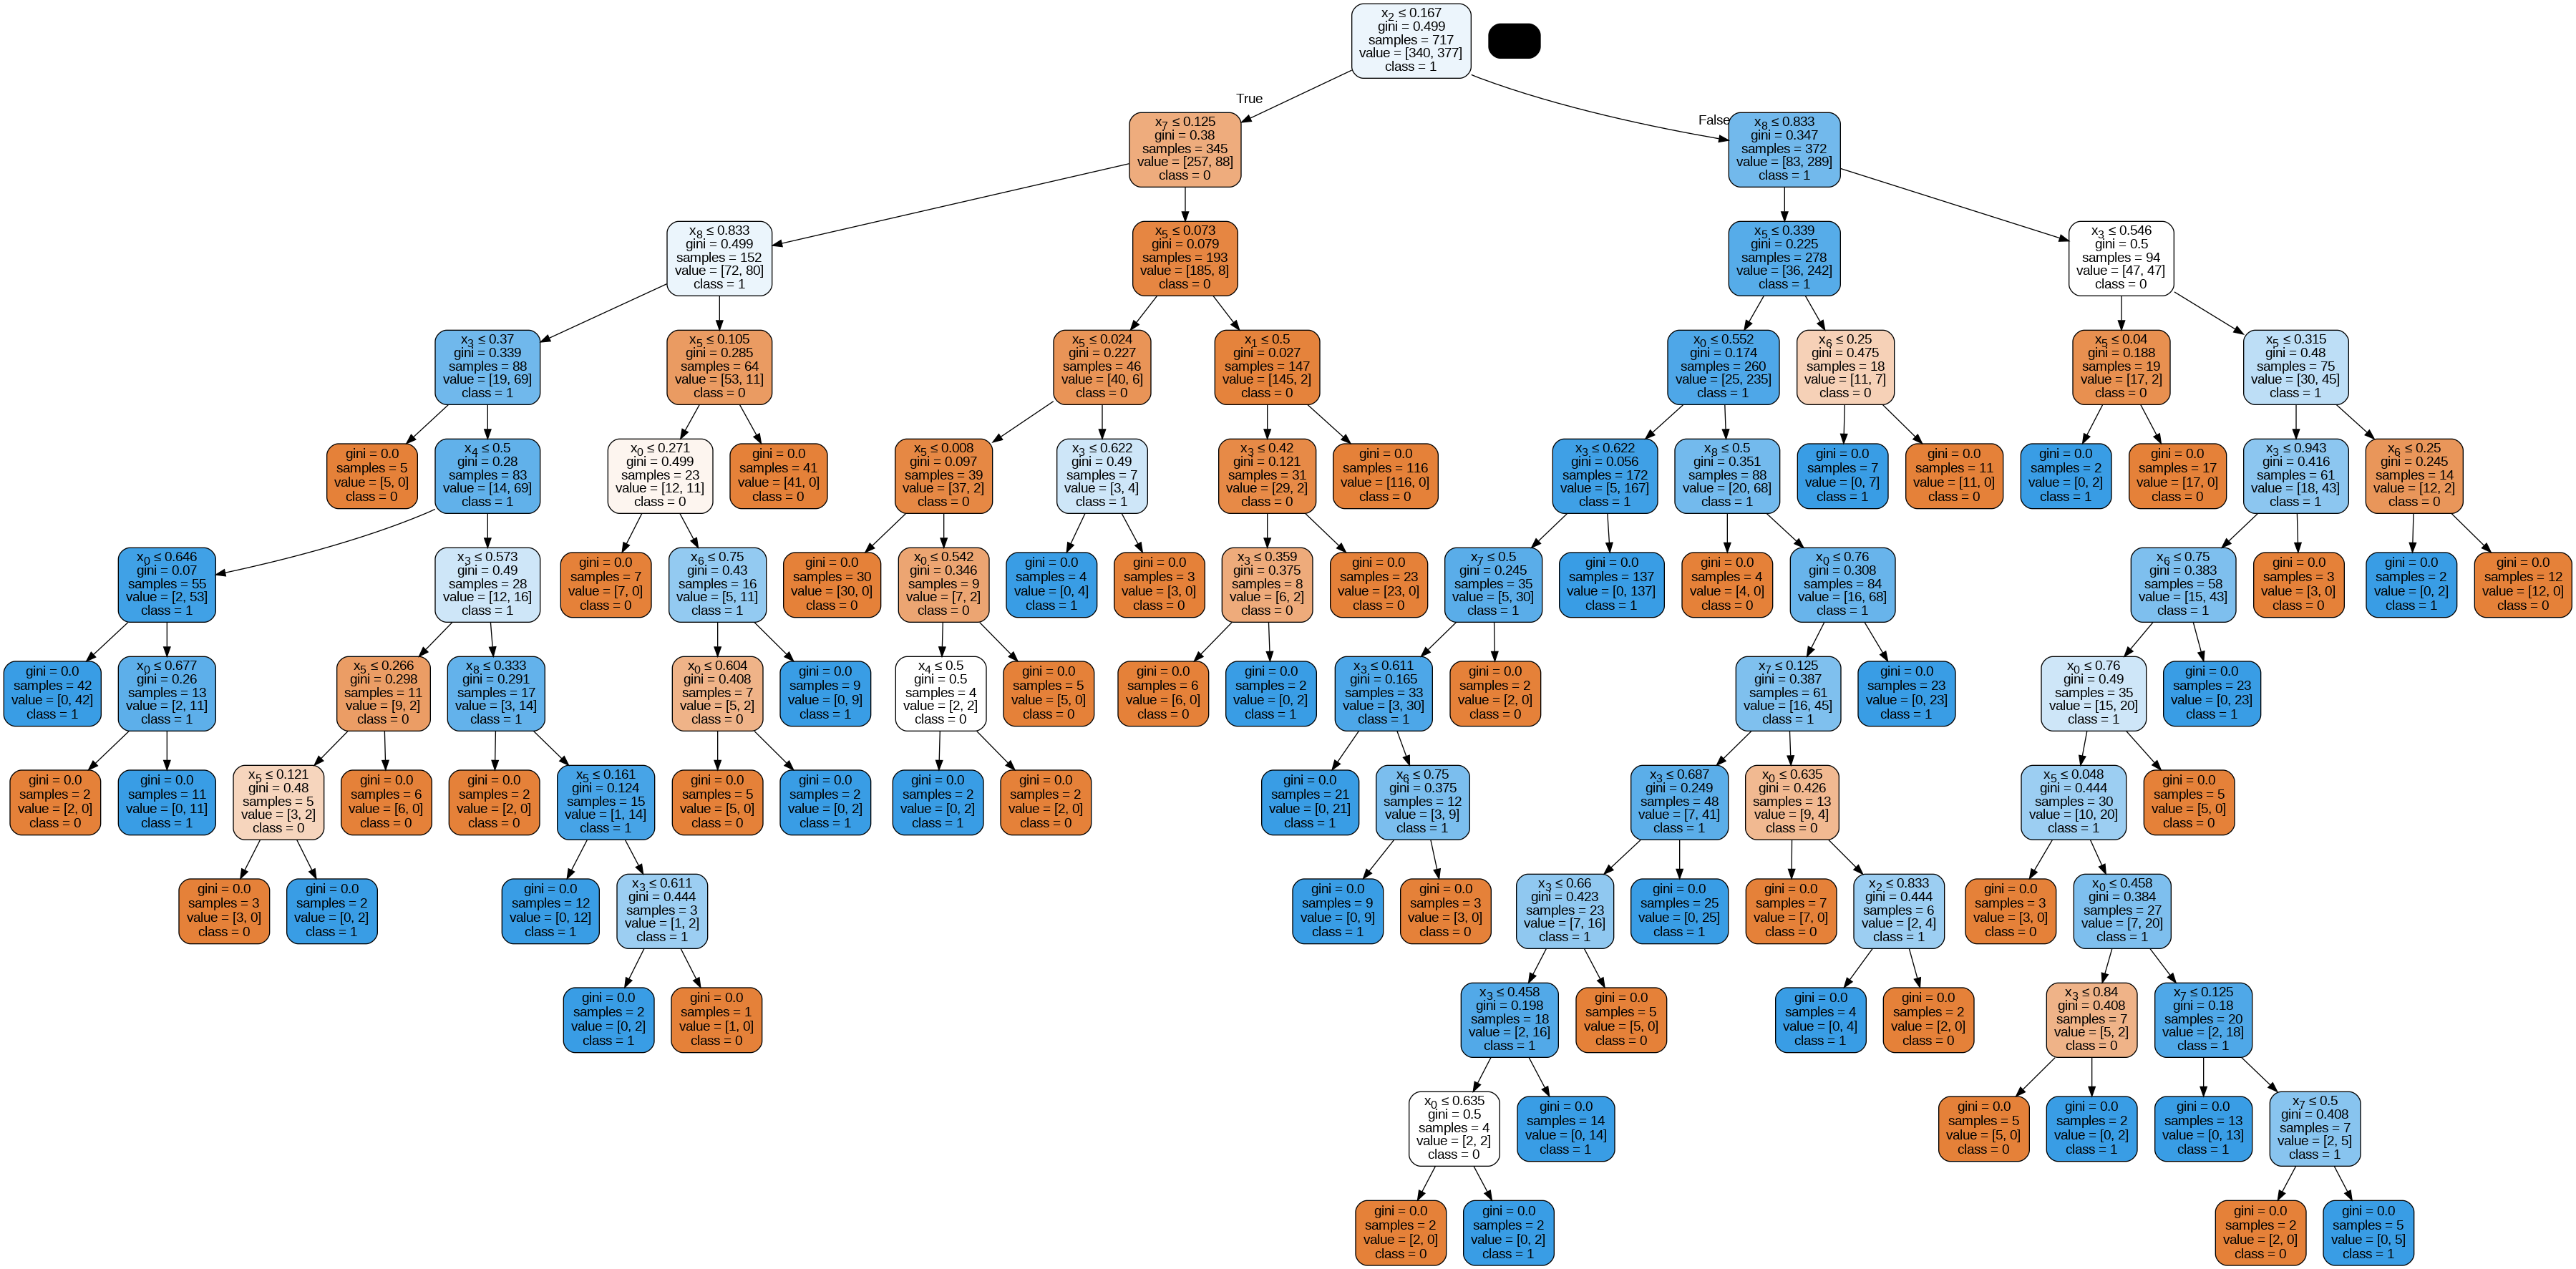

In [ ]:
from IPython.display import Image
import pydotplus
df=StringIO()
export_graphviz(clasf, out_file=df,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(df.getvalue())
Image(graph.create_png())

# **Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.**

In [ ]:
from sklearn import metrics
classifier1=DecisionTreeClassifier(criterion="entropy",max_depth=3)
classifier1=clasf.fit(x_train,y_train)
y_pred=clasf.predict(x_test)
print("Accuracy score=",metrics.accuracy_score(y_test,y_pred))


Accuracy score= 0.7252747252747253


In [ ]:
from sklearn.metrics import confusion_matrix
confmat=confusion_matrix(y_test,y_pred)
print(confmat)

[[31 10]
 [15 35]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



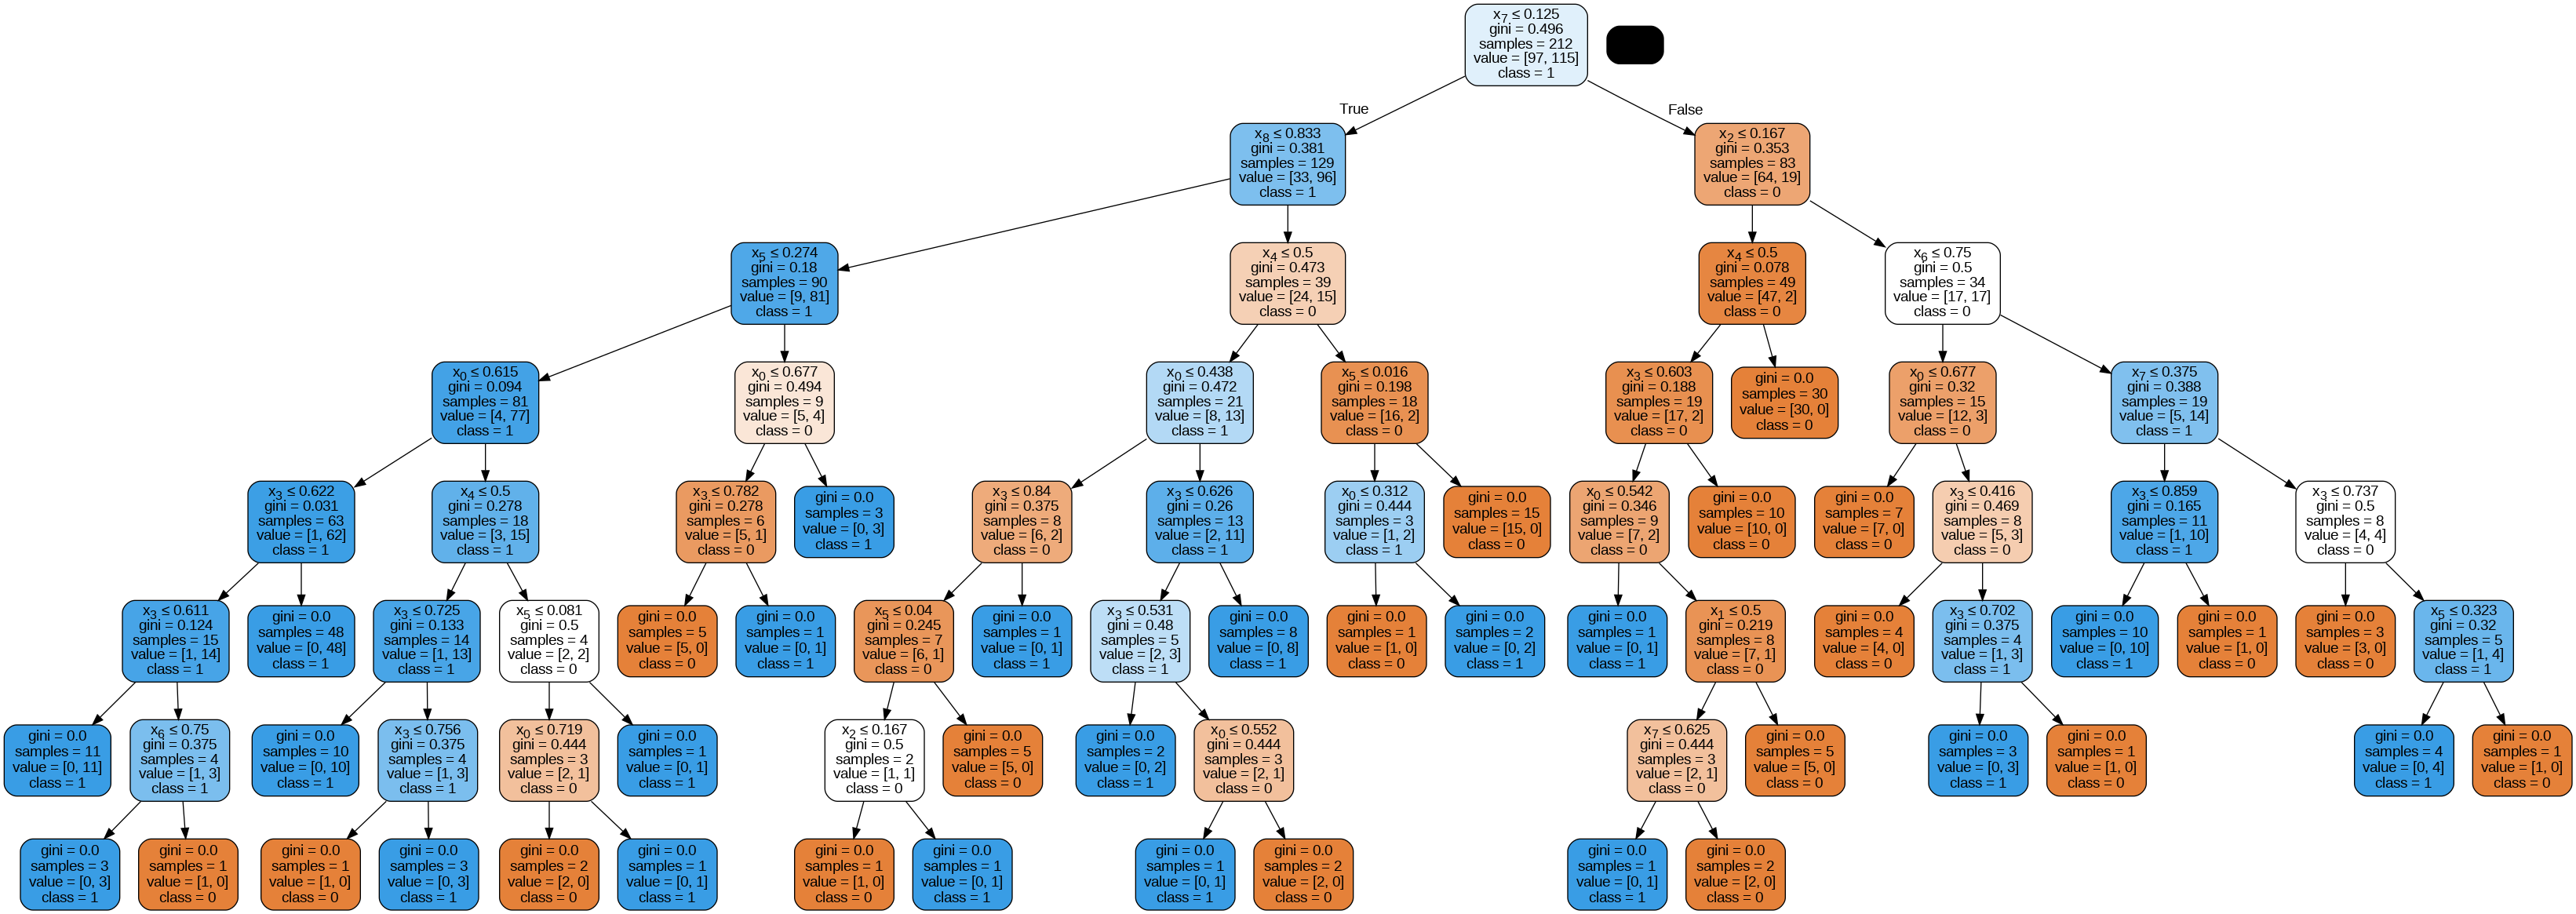

In [ ]:
from IPython.display import Image
import pydotplus
df=StringIO()
export_graphviz(clasf, out_file=df,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(df.getvalue())
Image(graph.create_png())

## **After pruning we can see that the accuracy increased from 69% to 73%**

----------------------------------------------------------------------------------------------------------------

3)**CLASSFICATION MODEL-NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [ ]:
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
#Returns the model's probabilities using the input relation
classifier.predict_proba(x_test)
# to calculate accuracy since it is such a common metric
classifier.score(x_test,y_test)

0.8461538461538461

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test,y_pred)
print(confmat)

[[36  5]
 [ 9 41]]


In [ ]:
pred=classifier.predict(x_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(y_test)

Predicted values:
[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1]
Actual values:
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]


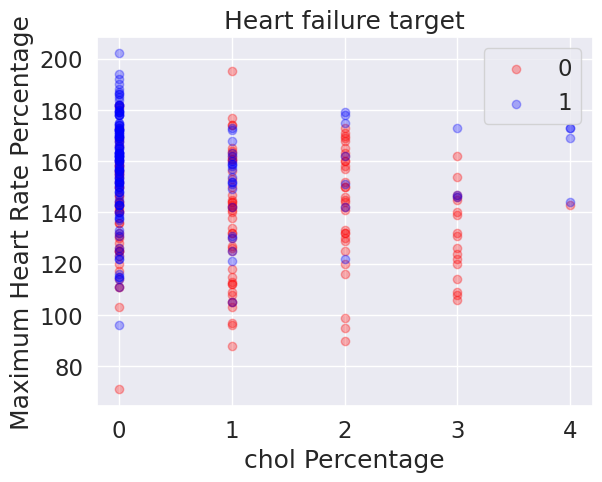

In [ ]:
import matplotlib.pyplot as plt
class1 = df[df.output == 0]
class2 = df[df.output == 1]
plt.title("Heart failure target")
plt.xlabel("chol Percentage")
plt.ylabel("Maximum Heart Rate Percentage")
plt.scatter(class1.caa,class1.thalachh,color="red",label =0,alpha=0.3)
plt.scatter(class2.caa,class2.thalachh,color="blue",label =1,alpha=0.3)
plt.legend()
plt.show()

--------------------------------------------------------------------------------------

4)**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
#n_estimators= The required number of trees in the Random Forest. The default value is 10
#criterion= It is a function to analyze the accuracy of the split
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = forest.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test,y_pred)
print(confmat)

[[36  5]
 [ 9 41]]


In [ ]:
pred=forest.predict(x_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(y_test)

Predicted values:
[0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1]
Actual values:
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1]


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# **CLASSIFICATION MODELS**

We will be comparing the accuracy of a couple of classification models and deduce the most accurate outputs.

The accuracy of **LOGISTIC REGRESSION, DECISION TREE CLASSIFIER** ,**NAIVE BAYES** and **RANDOM FOREST**

**CLASSIFICATION REPORT**

**TABLE OF ACTUAL VS PREDICTED LABELS FOR LOGISTIC REGRESSION**

In [ ]:
from sklearn.metrics import classification_report
y_predict=regModel.predict(x_test)
#using tested and predicted labels calculte all evaluation metrics
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



**TABLE OF ACTUAL VS PREDICTED LABELS FOR DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.metrics import classification_report
y_pred = clasf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



**TABLE OF ACTUAL VS PREDICTED LABELS FOR NAIVE BAYES**

In [ ]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



**TABLE OF ACTUAL VS PREDICTED LABELS FOR RANDOM FOREST**

In [ ]:
from sklearn.metrics import classification_report
y_pred = forest.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.88      0.74      0.80        50

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91



*********************************************************************************************************************************************************

**COMPARING PRECISION OF ALL MODELS:**

 Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

By comparing all the models in terms of precision we can infer that precision is seen to be higher for naive bayes.


**COMPARING RECALL OF ALL MODELS:**

Recall is the ability of a model to find all the relevant cases within a data set. Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

The recall for naive bayes model is seen to be the highest out of all the given models.

**COMPARING THE ACCURACY OF ALL THE THREE CLASSIFIERS**

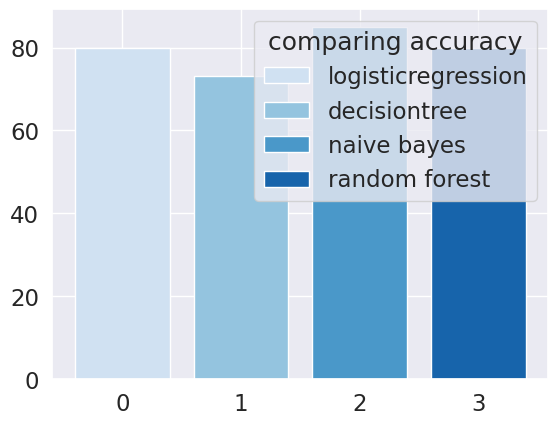

In [ ]:
x=[1,2,3,4]
y=[80,73,85,80]
sns.set_context(rc={"figure.figsize": (2,2)})
nd = np.arange(4)
width=0.9
fig = plt.bar(nd, y, color=sns.color_palette("Blues",4))
plt.legend(fig, ['logisticregression','decisiontree','naive bayes','random forest'],loc = "upper right",title = "comparing accuracy")
plt.show()

**Comment**

**We see that Naive Bayes gives maximum accuracy of 85% along with random forest and logistic regression giving us an accuracy of 80% , then decision tree with an accuracy percentage as low as 73% after pruning**

# **INSIGHTS FROM THE ABOVE MODEL**

The model was initially designed to predict whether or not a patient died of heart failure during the following time period

A clinical record dataset was chosen for this purpose which had the information of many patients of different ages.

 The analysed features included age,sex,cp,trestbps,chol,fbs	restecg,thalach	,xang	etc.

We then trained and tested 4 classification models and compared their accuracy score to find the onw which would be best suitable for our dataset.

All the three classifiers has good accuracy but to compare all of them according to the results obtained above but out of logistic regressions,decision tree classifier and naive bayes,Naive Bayes was able to give highest accuracy of almost 85%.

